In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline


In [4]:
import pandas as pd
 
hw_frame = pd.read_csv(
  'socr.txt', delim_whitespace=True,
  header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)
 
def input_fn():
  return tf.constant(hw_frame.as_matrix(),tf.float32, hw_frame.shape), None

In [6]:
hw_frame.head(2)

,Height,Weight
0,65.78,112.99
1,71.52,136.49


In [7]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
model = kmeans.fit(input_fn=input_fn)

In [8]:
model

KMeansClustering(params={'num_clusters': 4, 'mini_batch_steps_per_iteration': 1, 'distance_metric': 'squared_euclidean', 'use_mini_batch': True, 'random_seed': 0, 'kmeans_plus_plus_num_retries': 2, 'relative_tolerance': 0.0001, 'training_initial_clusters': 'random'})

In [9]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

[1,
 2,
 3,
 3,
 3,
 0,
 3,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 3,
 2,
 3,
 3,
 0,
 3,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 3,
 2,
 3,
 0,
 2,
 1,
 0,
 0,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 2,
 3,
 0,
 0,
 1,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 0,
 2,
 2,
 3,
 1,
 2,
 0,
 3,
 2,
 1,
 0,
 2,
 0,
 3,
 2,
 2,
 3,
 3,
 2,
 0,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 3,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 3,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 0,
 3,
 0,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 3,
 2,
 2,
 0,
 2,
 1,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 2,
 2,
 2]

In [11]:
def ScatterPlot(X, Y, assignments=None, centers=None):
    if assignments is None:
        assignments = [0] * len(X)
    fig = plt.figure(figsize=(14,8))
    cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
    plt.scatter(X, Y, c=assignments, cmap=cmap)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.show()

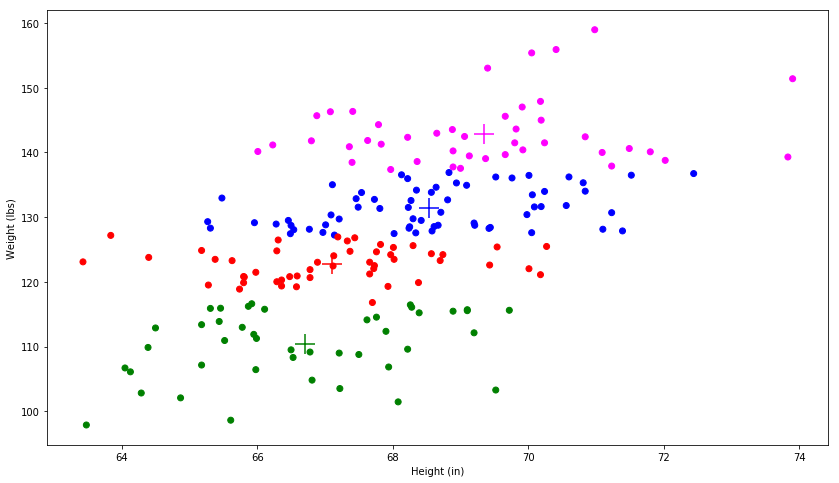

In [14]:
ScatterPlot(hw_frame.Height, hw_frame.Weight, assignments, clusters)